In [21]:
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt

from src.Net import Net
from src.MyDataset import MyDataset

In [22]:
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [23]:
#  CONSTANTS
batch_size = 8
num_workers = 2

In [24]:
# test_set = torchvision.datasets.CIFAR10(root="./data", train=False, transform=transform, download=True)
test_set = MyDataset("./labels/test_labels.csv", "./imgs/ref_imgs/test_imgs", transform=transform)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=num_workers)

In [25]:
classes = ("apple", "banana", "orange", "pineapple", "watermelon")

In [26]:
PATH = './model.pth'
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [27]:
correct = 0
total = 0

all_labels = []
all_outputs = []

# test_loader.__getitem__(0)

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        all_labels.append(labels.tolist())
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        all_outputs.append(predicted.tolist())
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the {total} test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 499 test images: 78 %


In [28]:
all_labels = [item for sublist in all_labels for item in sublist]
all_outputs = [item for sublist in all_outputs for item in sublist]

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(all_labels, all_outputs)

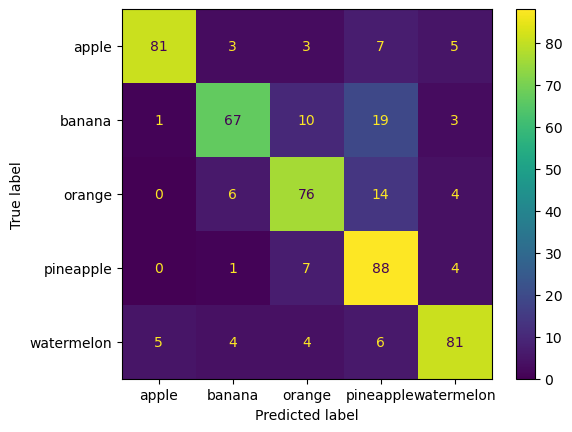

In [30]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(classes))

disp.plot()

plt.show()